<center><img src="https://polytech.univ-lyon1.fr/uas/polytech/LOGO/UDL_logo_blanc-01%20(2).png" alt="drawing" style="width:100px;"/></center>

# Introduction à Python pour la Data Science

## Exercices de Data Manipulation & Visualisation

On souhaite traiter le fichier «Census.xlsx».

«classe»  joue  un  rôle  particulier,  la  variable  indique  le  niveau  de  revenu  c.-à-d.  les  personnes  qui ont un revenu annuel supérieur (more) ou inférieur (less) à un seuil quelconque.

### Question 1

- Charger le fichier«Census.xlsx» (read_excel)
- Combien y a-t-il de variables dans le fichier ? 
- Combien y a-t-il d’observations? (info)

In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 210.2 kB/s eta 0:00:00a 0:00:01


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
Census = pd.read_excel('../99 - Datasets/Census.xlsx')

### Question 2

- Afficher le résumé des données (describe)

In [5]:
Census.describe()

,age,hours_per_week
count,48842.000000,48842.000000
mean,38.643585,40.422382
std,13.710510,12.391444
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


### Question 3

- quelle  est  la proportion des  hommes ? 
- celle des «classe= more»?

In [6]:
Census.sample(5)

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe
17557,62,Private,7th-8th,Married-civ-spouse,Protective-serv,Husband,White,Male,40,Cuba,less
35848,42,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,35,United-States,less
33228,72,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,White,Female,40,United-States,less
1673,29,Local-gov,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,45,United-States,less
40847,48,Private,Some-college,Divorced,Prof-specialty,Not-in-family,White,Female,50,United-States,less


In [7]:
Census.groupby('sex').count().age

sex
Female    16192
Male      32650
Name: age, dtype: int64

In [19]:
print("Il y a",Census[Census['classe'] == 'more'].count().age,"classe = more et",Census.count().age - Census[Census['classe'] == 'more'].count().age,"autres")

Il y a 11687 classe = more et 37155 autres


### Question 4


- Construire  le  diagramme  à  bandes  pour  les  variables  «marital_status»  et  «relationship» (http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html; bar).

- Pour les mêmes variables, construire les diagrammes à secteurs (http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html; pie).

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

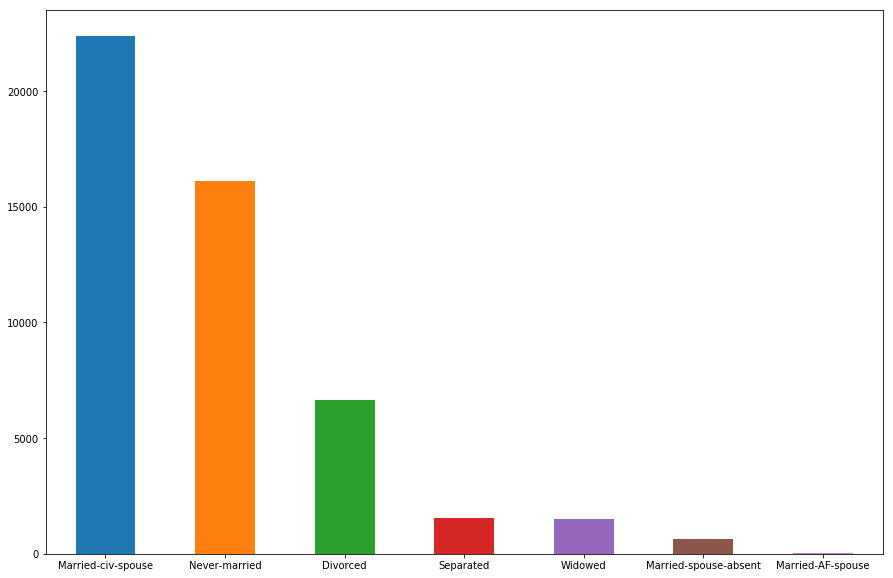

In [7]:
Census.marital_status.value_counts().plot.bar(figsize=(15,10))
plt.xticks(rotation='horizontal')

<BarContainer object of 7 artists>

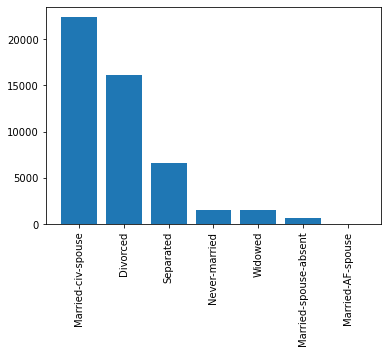

In [16]:
x = Census.marital_status.unique()
y = Census.marital_status.value_counts()
plt.xticks(rotation='vertical')
plt.bar(x,y)

<AxesSubplot:ylabel='marital_status'>

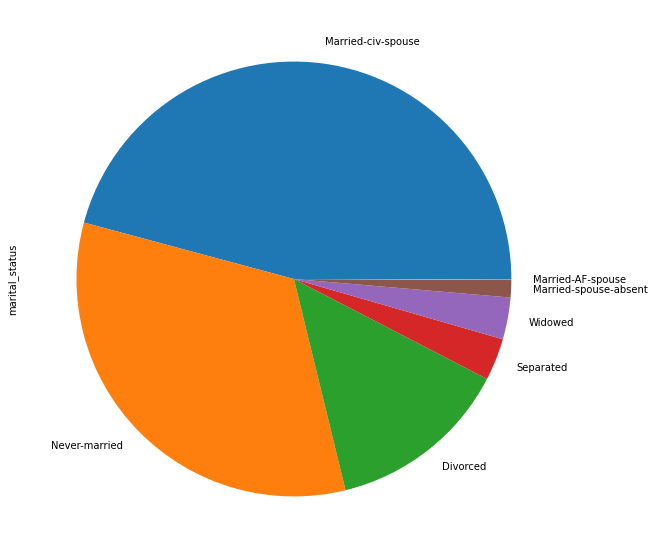

In [9]:
Census.marital_status.value_counts().plot.pie(figsize=(15,10))

### Question 5

- Croiser  les  variables  «classe»  et  « sex».  
- Quelle  est  la  proportion  des  «more»  parmi  les hommes? 
- Parmi les femmes? Est-ce  que ce résultat nous permet  de conclure que  le niveau de revenu est différent selon que l’on est un homme ou une femme? (crosstab)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

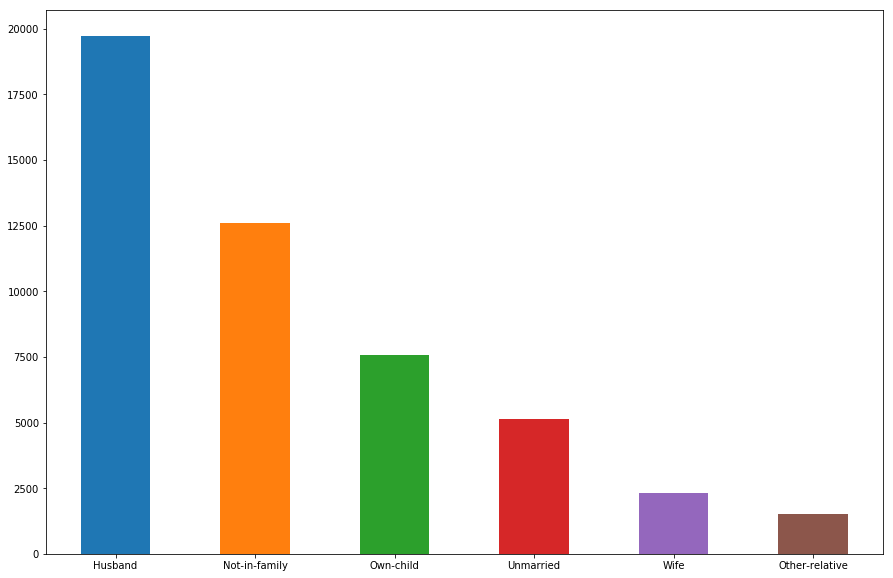

In [8]:
Census.relationship.value_counts().plot.bar(figsize=(15,10))
plt.xticks(rotation='horizontal')

<AxesSubplot:ylabel='relationship'>

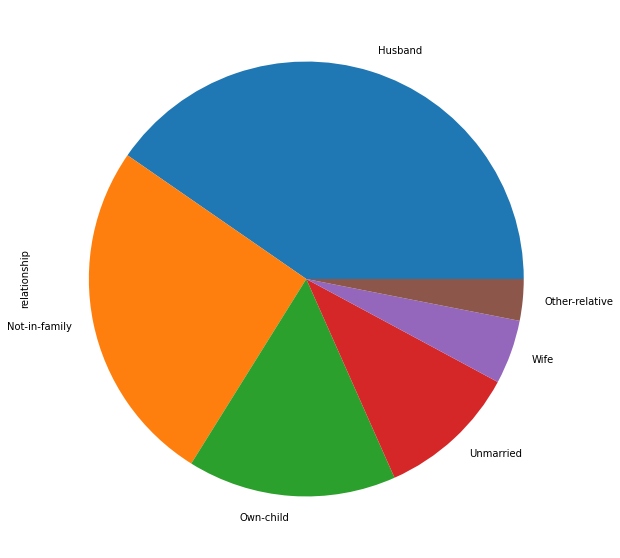

In [8]:
Census.relationship.value_counts().plot.pie(figsize=(15,10))

In [12]:
Census.sample()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe
18707,22,Private,HS-grad,Never-married,Other-service,Unmarried,White,Female,35,United-States,less


In [22]:
Census[Census['sex'] == 'Male'].groupby('classe').sex.count()

classe
less    22732
more     9918
Name: sex, dtype: int64

In [25]:
TABLE = pd.crosstab(Census.classe, Census.sex, margins=True)
TABLE

sex,Female,Male,All
classe,,,
less,14423,22732,37155
more,1769,9918,11687
All,16192,32650,48842


In [35]:
print(round(TABLE.Female.more/TABLE.All.more*100),"% des classes supérieures sont des femmes et",round(TABLE.Male.more/TABLE.All.more*100),"% sont des hommes")

15.0 % des classes supérieures sont des femmes et 85.0 % sont des hommes


In [40]:
print('Sur toutes les femmes,',round(TABLE.Female.more/TABLE.Female.All*100),'% sont de la classe supérieure alors que sur tous les hommes,',
      round(TABLE.Male.more/TABLE.Male.All*100),'% sont de la classe supérieure')

Sur toutes les femmes, 11.0 % sont de la classe supérieure alors que sur tous les hommes, 30.0 % sont de la classe supérieure


### Question 6

Croiser maintenant «relationship» et «marital status». Pour chaque valeur de «relationship», quelle  est  la modalité  de  «marital  status»  qui  lui  est  le  plus  associé?  (crosstab+ idxmax).  Que peut-on en conclure?

In [42]:
TABLE = pd.crosstab(Census.marital_status, Census.relationship, margins=False)
TABLE

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital_status,,,,,,
Divorced,0,3628,181,455,2369,0
Married-AF-spouse,12,0,1,1,0,23
Married-civ-spouse,19704,23,201,143,0,2308
Married-spouse-absent,0,330,54,61,183,0
Never-married,0,7114,920,6750,1333,0
Separated,0,637,79,146,668,0
Widowed,0,851,70,25,572,0


In [43]:
TABLE.idxmax()

relationship
Husband           Married-civ-spouse
Not-in-family          Never-married
Other-relative         Never-married
Own-child              Never-married
Unmarried                   Divorced
Wife              Married-civ-spouse
dtype: object

Nous voyons ici que le profil "never-married" est fortement associé à des profils cohérents comme "own-child / other relative / not-in-family"

### Question 8

- Penchons-nous maintenant sur la variable «age». Calculer sa moyenne et son écart-type (mean, std) (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

- Calculer la médiane et les quartiles d’ordre 1 et 3 de l’âge (quantile).

In [23]:
print("L'age moyen est de ",round(Census.age.mean()),"ans")
print("L'écart-type de l'age est",round(Census.age.std()),"ans")

L'age moyen est de  39 ans
L'écart-type de l'age est 14 ans


In [46]:
Census.age.median()

37.0

In [45]:
Census.age.quantile([0.25,0.75]) 

0.25    28.0
0.75    48.0
Name: age, dtype: float64

### Question 9

- Construire  le  graphique  BOXPLOT  (boîte  de  Tukey)  pour  la  variable  «âge»  (boxplot).  Que remarque-t-on?

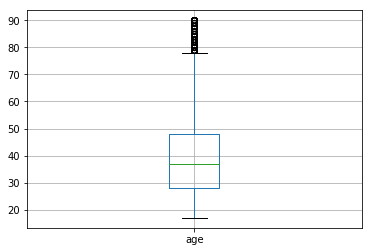

In [15]:
Census.boxplot(['age'])

### Question 10

- Produire l’histogramme de la variable âge (hist).

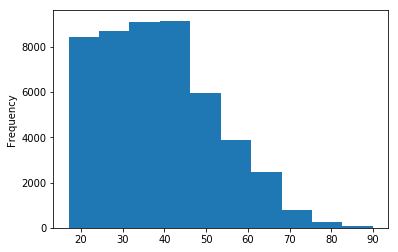

In [50]:
Census.age.plot.hist()

### Question 11

- Calculer  la  corrélation  entre  «age»  et  «hours  per  week»  (corr).  Peut-on  dire  que  ces  deux variables sont liées? Réaliser le graphique nuage de points entre ces deux variables pour affiner votre réponse (scatter). Que conclure?


In [51]:
Census.age.corr(Census.hours_per_week)
# La correlation est très faible entre ces variables. 
# Il n'y a donc pas de lien significatif.

0.07155833852698279

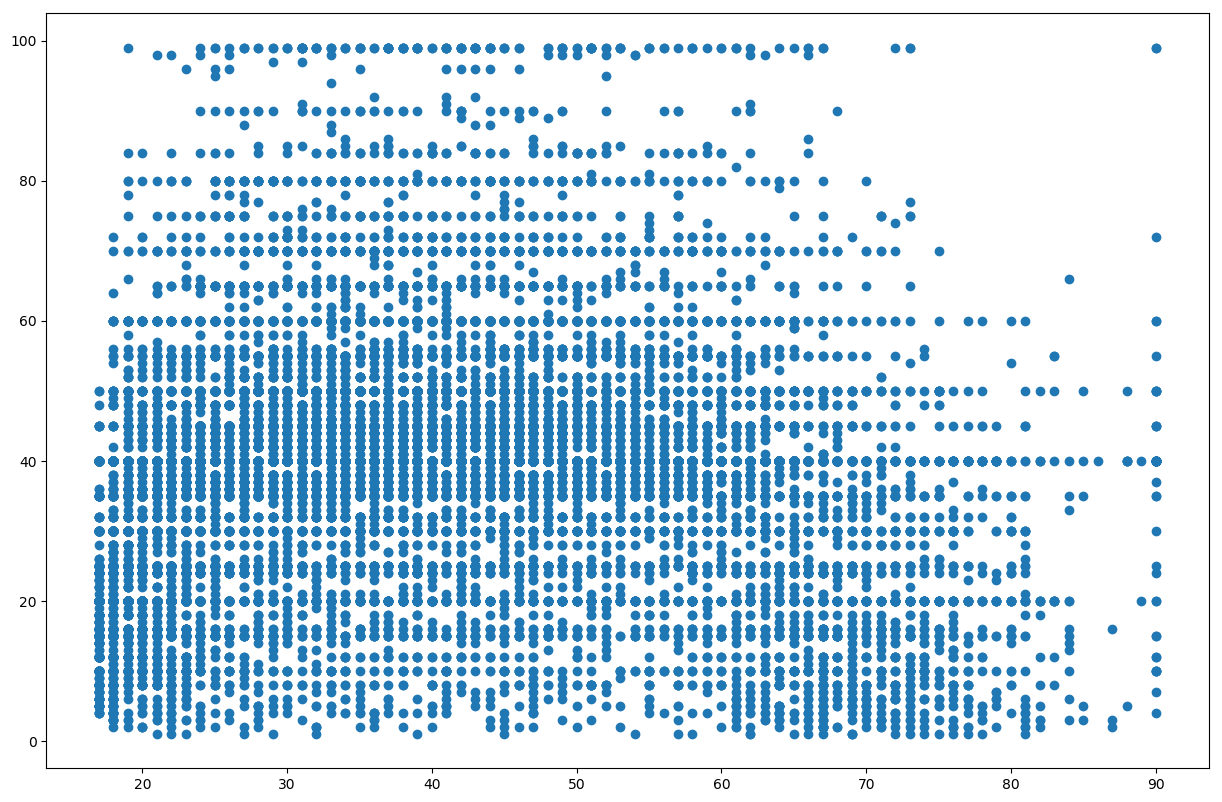

In [52]:
plt.figure(figsize=(15, 10), dpi=100)
plt.scatter(Census.age, Census.hours_per_week)

### Question 12


- Construire  le  boxplot  de  «âge»  selon  «relationship»  (boxplot).  Il  y  a  des choses  à  remarquer dans ce graphique? 


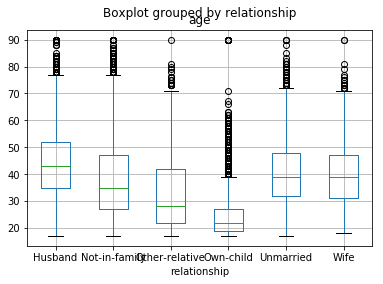

In [57]:
Census.boxplot("age", by="relationship")

Les own-child semblent significativement plus jeunes que les autres profils.

### Question 13

- Calculer la moyenne de l’âge pour chaque valeur de «relationship»  (pivot_table).  Le  calcul confirme l’impression laissée par le graphique précédent?

In [61]:
import numpy as np
pd.pivot_table(Census, index=["relationship"], values=["age"], aggfunc=np.mean)

,age
relationship,
Husband,43.906066
Not-in-family,38.421601
Other-relative,33.420983
Own-child,24.794090
Unmarried,40.312195
Wife,40.078507


Nous remarquons bien que les own-child ont une moyenne d'age plus basse que les autres profils. 

### Question 14


- On s’intéresse à l’influence du niveau d’instruction (education)  sur le  revenu (classe). Créez une variable qui permet d’identifier les personnes ayant un des niveaux suivants: "Bachelors","Masters", "Prof-school", "Doctorate".  Combien d’observations répondent à ce critère? (isin)


In [63]:
Census.loc[Census['education'].isin([ "Bachelors","Masters", "Prof-school", "Doctorate"])].describe()


,age,hours_per_week
count,12110.000000,12110.000000
mean,40.871924,43.274484
std,12.054458,12.140483
min,18.000000,1.000000
25%,31.000000,40.000000
50%,40.000000,40.000000
75%,48.000000,50.000000
max,90.000000,99.000000


In [64]:
len(Census)

48842

Nous avons 12110 personnes qui répondent à ces critères d'études, sur un total de 48842 personnes au total.

### Question 15


- Quelle est la proportion de classe = more parmi ces individus, quelle est cette même proportion chez les autres (qui n’ont pas ce niveau d’études). Est-ce que le niveau d’instruction a un impact sur le revenu? (crosstab)

In [71]:
TABLE = pd.DataFrame(Census, columns=["education", "classe"])
pd.crosstab(TABLE.education, TABLE.classe, margins=True)

classe,less,more,All
education,,,
10th,1302,87,1389
11th,1720,92,1812
12th,609,48,657
1st-4th,239,8,247
5th-6th,482,27,509
7th-8th,893,62,955
9th,715,41,756
Assoc-acdm,1188,413,1601
Assoc-voc,1539,522,2061


In [72]:
TABLE = pd.DataFrame(Census.loc[Census['education'].isin([ "Bachelors","Masters", "Prof-school", "Doctorate"])], columns=["education", "classe"])
pd.crosstab(TABLE.education, TABLE.classe, margins=True)

classe,less,more,All
education,,,
Bachelors,4712,3313,8025
Doctorate,163,431,594
Masters,1198,1459,2657
Prof-school,217,617,834
All,6290,5820,12110


Nous remarquons que la représentation des classes supérieures est plus importantes pour les niveaux d'études hauts. On peut donc confirmer le lien qu'il existe entre ces deux variables.

## Enseignant
Patrice Mazel - patrice.mazel@protonmail.com - 3A MAM 2021/2022